# High Frequency Moments of the Green's Functions and Self-energy


We present the derivation of the high-frequency moments of the Green's function and self-energy, as well as show case their use in TRIQS/cthyb.

## Derivation
The following derivation follows closely [Rev. Mod. Phys 83, 349 (2011)](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.83.349) and [Phys. Rev. B 84, 073104 (2011)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.84.073104).

The high-frequency expansion of the Green's function takes the following form 

$$ \mathbf{G}(i\omega_{n}) = \frac{1}{i\omega_{n}}\mathbf{G}_{0} + \frac{1}{(i\omega_{n})^{2}}\mathbf{G}_{1} + \frac{1}{(i\omega_{n})^{3}}\mathbf{G}_{2} + \cdots, $$
where the coefficients are related to time derivatives of the Green's function:

$$ \mathbf{G}_{0} = -(G(0) + G(\beta)) = \delta_{ab}$$
$$ \mathbf{G}_{1} = \partial_{\tau}G(0) + \partial_{\tau}G(\beta) = -\langle \{[H, d_{a}], d_{b}^{\dagger} \} \rangle $$
$$ \mathbf{G}_{2} = -\big (\partial^{2}_{\tau}G(0) + \partial^{2}_{\tau}G(\beta) \big ) = \langle \{[H, d_{a}], [d_{b}^{\dagger},H] \} \rangle, $$
where $H$ is the general Anderson impurity hamiltonian,

$$H = \sum_{k,\alpha} \varepsilon_{k\alpha}c^{\dagger}_{k\alpha}c_{k\alpha} + \sum_{k\alpha b} \big ( V_{k}^{\alpha b} c^{\dagger}_{k\alpha}d_{b} + \mathrm{h.c.}\big ) + \sum_{ab}E_{ab}d^{\dagger}_{a}d_{b} + \frac{1}{2}\sum_{abcd}U_{abcd}d^{\dagger}_{a}d^{\dagger}_{b}d_{d}d_{c}.$$

The coefficients for the Weiss field can be obtained from the same expressions as the Green's function with the hamiltonian replaced with the just the non-interacting part. To derive the analogous coefficients for the self-energy, we start with the Dyson equation,

$$\mathbf{\Sigma} = \Big ((\mathbf{G}_{0} )^{-1} - \mathbf{G}^{-1} \Big ).$$

Using the high-frequency expression for the Green's function and Weiss field,

$$ \mathbf{\Sigma} = \frac{1}{\frac{1}{i\omega_{n}} + \frac{1}{(i\omega_{n})^{2}}(\mathbf{G}_{0})_{1} + \frac{1}{(i\omega_{n})^{3}} (\mathbf{G}_{0})_{2}}-\frac{1}{\frac{1}{i\omega_{n}} + \frac{1}{(i\omega_{n})^{2}}\mathbf{G}_{1} + \frac{1}{(i\omega_{n})^{3}} \mathbf{G}_{2}}$$

Expanding this expression for large $i\omega_{n}$ and simplifying,

$$\mathbf{\Sigma} = \Big (\mathbf{G}_{1} - (\mathbf{G}_{0})_{1} \Big ) + \frac{1}{i\omega_{n}} \Big (\mathbf{G}_{2} - (\mathbf{G}_{0})_{2} +((\mathbf{G}_{0})_{1})^{2} - \mathbf{G}_{1}^{2} \Big) + \mathcal{O}\Big ( (i\omega_{n})^{-2}\Big )$$

We now identify the leading terms,

$$ \mathbf{\Sigma}_{\infty} \equiv \mathbf{G}_{1} - (\mathbf{G}_{0})_{1} $$
$$ \mathbf{\Sigma}_{1} \equiv \mathbf{G}_{2} - (\mathbf{G}_{0})_{2} +((\mathbf{G}_{0})_{1})^{2} - \mathbf{G}_{1}^{2} $$

We can simplify these expressions by plugging in their definitions from above,

$$\Sigma_{\infty}^{ab} = -\langle \{[H, d_{a}], d_{b}^{\dagger} \} \rangle + \langle \{[H-H_{\mathrm{int}}, d_{a}], d_{b}^{\dagger} \} \rangle  = - \langle \{[H_{\mathrm{int}}, d_{a}], d_{b}^{\dagger} \} \rangle $$

$$\Sigma_{1}^{ab} = \langle \{ [H_{\mathrm{int}}, [H_{\mathrm{int}}, d_{a} ]], d_{b}^\dagger \} \rangle - (\Sigma_{\infty}^{ab} )^{2} $$


## Implentation in TRIQS/cthyb

The moments are automatically calculated and stored as members of the TRIQS/cthyb solver when ``measure_density_matrix = True``. The moments for the Green's function and self-energy are stored as ``Solver.G_moments`` and ``Solver.Sigma_moments``, with the matching block structure of the ``Gf`` objects. The moments of the Green's function are used in the Fourier transform of $G(\tau)$ to $G(i\omega_{n})$. The moments of the self-energy are used in the tail fitting routine, where the first two ``known_moments`` now correspond to the calculated first and second moments of the self-energy.

In [1]:
from triqs.gf import *
from triqs.operators import *
from triqs_cthyb import Solver
import triqs.utility.mpi as mpi

import numpy as np
import matplotlib.pyplot as plt

Starting serial run at: 2022-12-27 12:43:23.819200


In [2]:
D, V, U = 1.0, 0.2, 4.0

ef, beta = -U/2.0, 50
H = U*n('up',0)*n('down',0)
S = Solver(beta=beta, gf_struct=[('up',1), ('down', 1)])

for name, g0 in S.G0_iw: g0 << inverse(iOmega_n - ef - V**2 * Wilson(D))

S.solve(h_int = H,
                n_cycles =500000,
                length_cycle = 200,
                n_warmup_cycles = 100000,
                measure_density_matrix=True, # moments will be calculated automatically
                use_norm_as_weight = True,
                )


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
-2*c_dag('down',0)*c('down',0) + -2*c_dag('up',0)*c('up',0) + 4*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...
12:43:24   0% ETA 00:00:14 cycle 674 of 100000
12:43:26  12% ETA 00:00:14 cycle 12669 of 100000
12:43:29  29% ETA 00:00:11 cycle 29488 of 100000
12:43:32  51% ETA 00:00:07 cycle 51998 of 100000
12:43:36  79% ETA 00:00:02 cycle 79931 of 100000



Accumulating ...
12:43:39   0% ETA 00:01:10 cycle 706 of 500000
12:43:41   2% ETA 00:01:09 cycle 14851 of 500000
12:43:43   6% ETA 00:01:06 cycle 32596 of 500000
12:43:46  10% ETA 00:01:03 cycle 54745 of 500000
12:43:50  16% ETA 00:00:59 cycle 82271 of 500000
12:43:55  23% ETA 00:00:54 cycle 116776 of 500000
12:44:02  31% ETA 00:00:48 cycle 159808 of 500000
12:44:09  42% ETA 00:00:41 cycle 212966 

Here, we can compare the high-frequency expansion of the self-energy to the real and imaginary parts of the self-energy obtained from the Dyson equation using the sampled Green's function and input Weiss field. The real part corresponds to the overall Hartree shift and the imaginary part captures the correct high-frequency tail behavior.

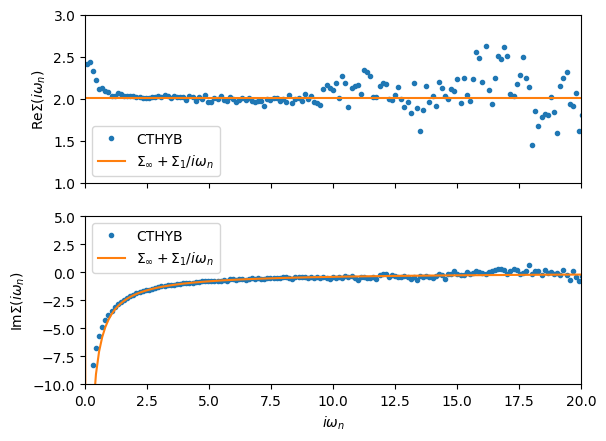

In [3]:
iwn = np.array([complex(x) for x in S.Sigma_iw.mesh])
fig, ax = plt.subplots(2,1, sharex=True)
high_freq = S.Sigma_moments['up'][0][0,0] + S.Sigma_moments['up'][1][0,0]/iwn
ax[0].plot(iwn.imag, S.Sigma_iw['up'].data[:,0,0].real, 'o', ms=3, label='CTHYB')
ax[0].plot(iwn.imag, high_freq.real, '-', label=r'$\Sigma_{\infty} + \Sigma_{1}/i\omega_{n}$')
ax[1].plot(iwn.imag, S.Sigma_iw['up'].data[:,0,0].imag, 'o', ms=3, label='CTHYB')
ax[1].plot(iwn.imag, high_freq.imag, '-', label=r'$\Sigma_{\infty} + \Sigma_{1}/i\omega_{n}$')
ax[0].legend(); ax[1].legend()
ax[1].set_xlabel(r'$i\omega_{n}$'); 
ax[0].set_ylabel(r'Re$\Sigma(i\omega_{n})$')
ax[1].set_ylabel(r'Im$\Sigma(i\omega_{n})$')
ax[0].set_xlim(0, 20);
ax[0].set_ylim(1,3); ax[1].set_ylim(-10, 5)
plt.subplots_adjust(wspace=0.5)
plt.show()

Additionally, we can verify the relationship between the first moment of the Green's function and first moment of the self-energy,
$$ \mathbf{\Sigma}_{\infty} = \mathbf{G}_{1} - (\mathbf{G}_{0})_{1}$$
$$ \mathbf{\Sigma}_{\infty} = \mathbf{G}_{1} - \mathbf{E}, $$
where $\mathbf{E}$ are the local impurity levels.

In [4]:
E = {key[-1][1][0] : coef for key, coef in S.h_loc0}
(S.Sigma_moments['up'][0] - S.G_moments['up'][-1] + E['up'])

array([[-2.30926389e-14+0.j]])